In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

from mpl_settings_v3 import *

from metodos import choose_solver, Qtest, QtildeTest

## **Definiciones**

$$
Q(t) = \dfrac{v^{(1)}(t,k) - y(t)}{v^{(2)}(t,k/2) - y(t)} \simeq 2^p
$$


$$
\tilde{Q}(t) = \dfrac{v^{(1)}(t,k) -v^{(2)}(t,k/2)}{v^{(2)}(t,k/2) -v^{(3)}(t,k/4)} \simeq 2^p
$$

## **Test 1**

Ecuación

$$
\begin{align}
y(t) &= \lambda y + \sin(2\pi t) \\
y(0) &= 1
\end{align}
$$

Solución analítica:

$$
y(t) = \dfrac{\lambda}{\lambda^2+4\pi^2} \sin(2\pi t) + \left[e^{\lambda t} - \cos(2\pi t) \right] \dfrac{2\pi}{\lambda^2+4\pi^2}
$$

In [11]:
method = 'eulerImproved'

solver = choose_solver(method)
    
def f(y, t):
    return -y + np.sin(2*np.pi*t)

def y_theo(t, l=-1):
    a = (l**2+4*np.pi**2)
    return -(l/a)*np.sin(2*np.pi*t) + (np.exp(l*t) - np.cos(2*np.pi*t)) * (2*np.pi/a) + np.exp(l*t)

l = -1
y0 = 1
t0 = 0
T = 2
time = np.linspace(t0, T, 1000)
k_values = [0.1, 0.01, 0.001]
y_euler_sol = {}
euler_times = {}
for k in k_values:
    euler_times[k], y_euler_sol[k] = solver(f, k, t0, T, y0)
    
    
Qk = 0.0001
Qtime, Q   = Qtest(f, Qk, t0, T, y0, y_theo, method=method)   
Q2time, Q2 = QtildeTest(f, Qk, t0, T, y0, method=method)   

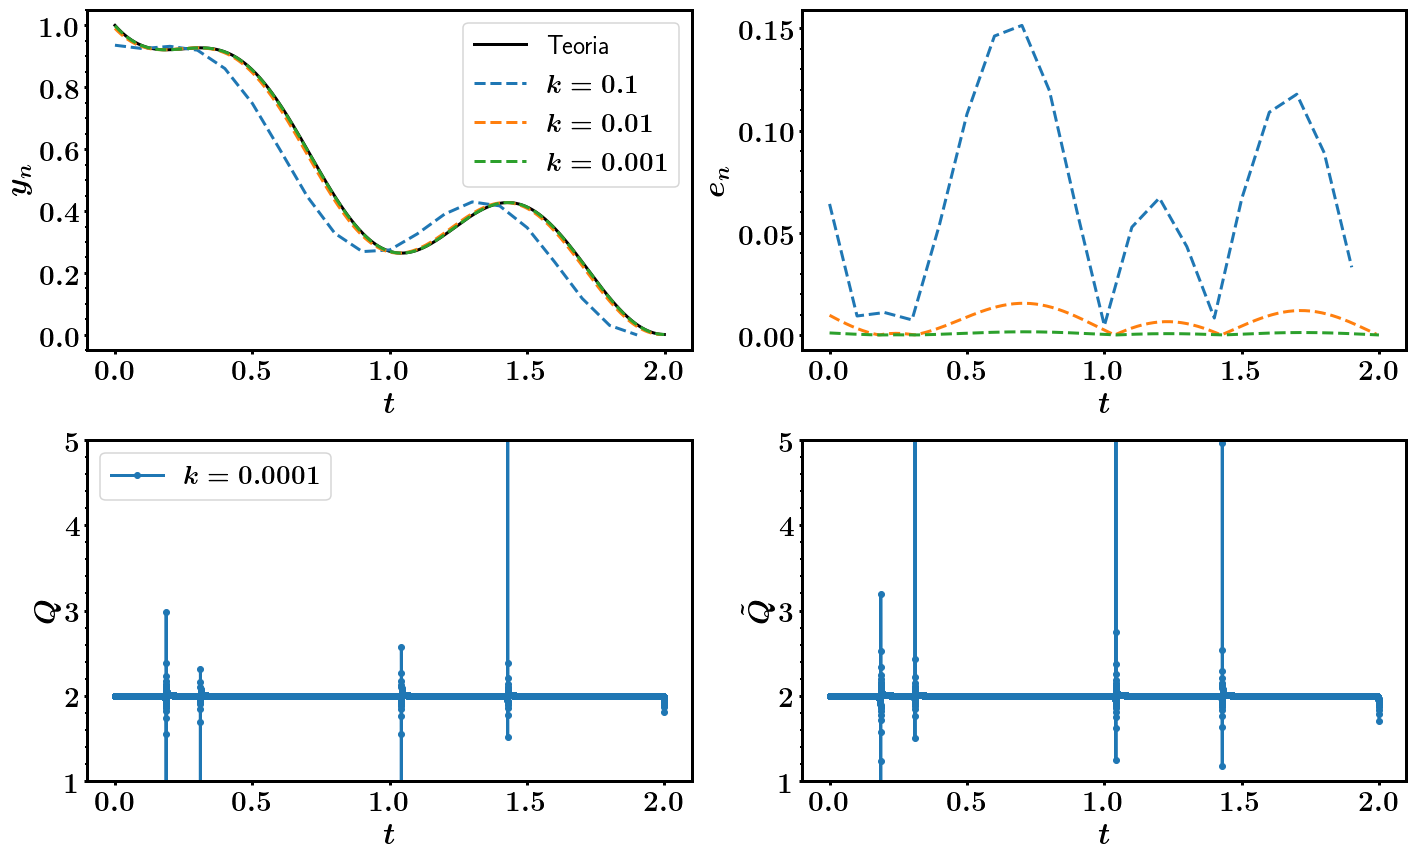

In [14]:
ncols = 2
nrows = 2
fig, axes = plt.subplots(figsize=(10*ncols,6*nrows), ncols=ncols, nrows=nrows)

for ax in axes.flatten():
    ax.set_xlabel(r'$t$')

ax = axes[0,0]
ax.set_ylabel(r'$y_n$')
ax.plot(time, y_theo(time, l), color='k', label='Teoria')
for k in k_values:
    ax.plot(euler_times[k], y_euler_sol[k], '--', label=r'$k = {{{}}}$'.format(k))
ax.legend()

ax = axes[0,1]

ax.set_ylabel(r'$e_n$')
for k in k_values:
    time = euler_times[k]
    err = np.fabs(y_theo(time, l) - y_euler_sol[k])
    ax.plot(euler_times[k], err, '--')


ax = axes[1,0]
ax.set_ylim(1, 5)
ax.set_ylabel(r'$Q$')
ax.plot(Qtime, Q, '-o', label=r'$k = {{{}}}$'.format(Qk))
ax.legend()

ax = axes[1,1]
ax.set_ylim(1, 5)
ax.set_ylabel(r'$\tilde{Q}$')
ax.plot(Q2time, Q2, '-o')

plt.tight_layout()
plt.show()

## **Test 2**

